# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from api_keys import geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
weather_api_key

'1246b2d046e19271d6a0e4cc6928c505'

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city

   # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

#     # Run an API request for each of the cities
    try:
#         # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

#       Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp - 273,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except:
         print("City not found. Skipping...")
         pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | dunedin
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | pont rouge
Processing Record 4 of Set 1 | puerto baquerizo moreno
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | papatowai
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | west island
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | castillos
Processing Record 18 of Set 1 | santarem
Processing Record 19 of Set 1 | vilyuchinsk
Processing Record 20 of Set 1 | south williamsport
Processing Record 21 of Set 1 | beterou
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dunedin,-45.8742,170.5036,12.74,86,12,5.92,NZ,1712037215
1,tiksi,71.6872,128.8694,-11.70,88,98,8.93,RU,1712037322
2,pont rouge,48.8833,-72.0825,-1.69,78,12,2.96,CA,1712037322
3,puerto baquerizo moreno,-0.9000,-89.6000,24.25,81,65,2.43,EC,1712037322
4,puerto ayora,-0.7393,-90.3518,23.79,97,80,0.89,EC,1712037322
...,...,...,...,...,...,...,...,...,...
533,vammala,61.3333,22.9000,-0.09,89,100,4.51,FI,1712037437
534,susanville,40.4163,-120.6530,6.72,79,0,1.34,US,1712037326
535,zaysan,47.4667,84.8667,7.37,55,1,2.55,KZ,1712037437
536,rafsanjan,30.4067,55.9939,15.39,39,70,0.79,IR,1712037437


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dunedin,-45.8742,170.5036,12.74,86,12,5.92,NZ,1712037215
1,tiksi,71.6872,128.8694,-11.70,88,98,8.93,RU,1712037322
2,pont rouge,48.8833,-72.0825,-1.69,78,12,2.96,CA,1712037322
3,puerto baquerizo moreno,-0.9000,-89.6000,24.25,81,65,2.43,EC,1712037322
4,puerto ayora,-0.7393,-90.3518,23.79,97,80,0.89,EC,1712037322


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dunedin,-45.8742,170.5036,12.74,86,12,5.92,NZ,1712037215
1,tiksi,71.6872,128.8694,-11.70,88,98,8.93,RU,1712037322
2,pont rouge,48.8833,-72.0825,-1.69,78,12,2.96,CA,1712037322
3,puerto baquerizo moreno,-0.9000,-89.6000,24.25,81,65,2.43,EC,1712037322
4,puerto ayora,-0.7393,-90.3518,23.79,97,80,0.89,EC,1712037322


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

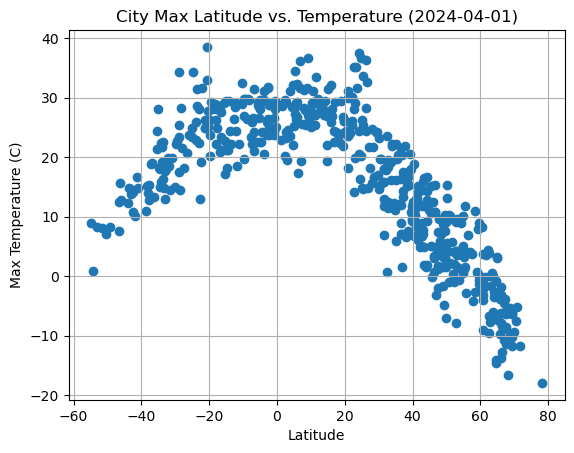

<Figure size 1000x675 with 0 Axes>

In [8]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]

plt.scatter(
    x=x,
    y=y, 
    marker="o"
)

# # Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-04-01)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True) 
plt.figure(figsize=(10, 6.75))

# # Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

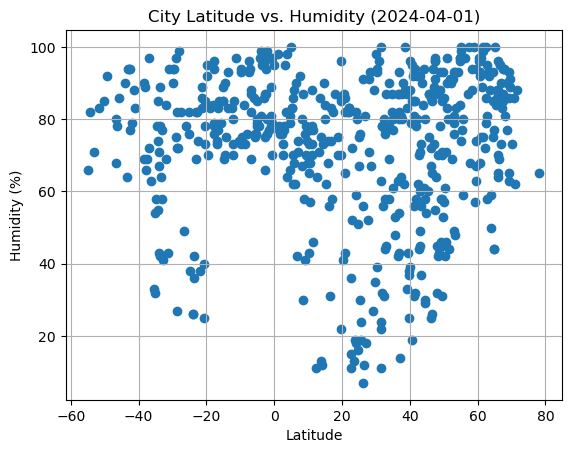

<Figure size 1000x675 with 0 Axes>

In [9]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]

plt.scatter(
    x=x,
    y=y, 
    marker="o"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-04-01)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True) 
plt.figure(figsize=(10, 6.75))


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

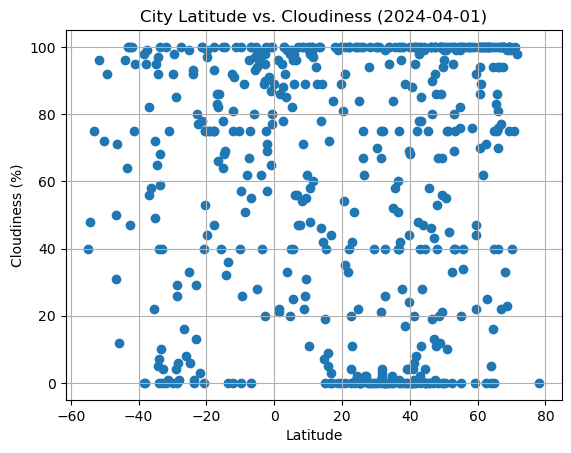

<Figure size 1000x675 with 0 Axes>

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]

plt.scatter(
    x=x,
    y=y, 
    marker="o"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-04-01)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True) 
plt.figure(figsize=(10, 6.75))

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

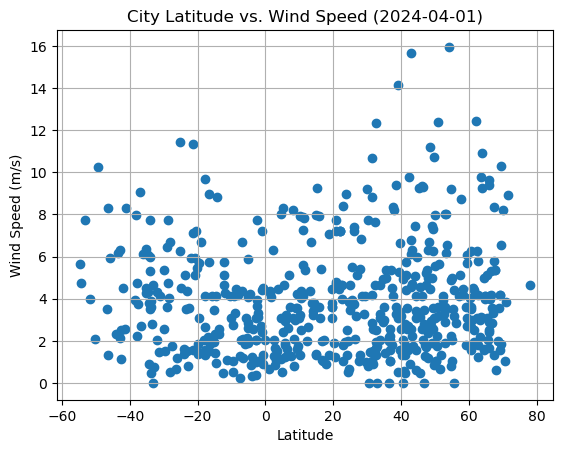

<Figure size 1000x675 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]

plt.scatter(
    x=x,
    y=y, 
    marker="o"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-04-01)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True) 
plt.figure(figsize=(10, 6.75))

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

        # The function to create linear Regression Plots is defined as follows:
        #     res = linregress(x, y) , where
        #          x = "Lat" in all plots
        #          y = one of "Max Temp", "Humidity", "Cloudness", and "Wind Speed"
        #     res includes a determination of rvalue which will be printed for each ploy

# The correlation r measures the strength of the linear relationship 
# between two quantitative variables.  Here, r < 0.3 None or Very Weak, 0.3 < r < 0.5 Weak, 0.5 < 0.7 Moderate, r > 0.7 Strongto indicate the strength of the linear relationship is consdiered ____.
# See https://www.westga.edu/academics/research/vrc/assets/docs/scatterplots_and_correlation_notes.pdf#:~:text=The%20correlation%20r%20measures%20the%20strength%20of%20the,near%200%20indicate%20a%20very%20weak%20linear%20relationship.
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tiksi,71.6872,128.8694,-11.70,88,98,8.93,RU,1712037322
2,pont rouge,48.8833,-72.0825,-1.69,78,12,2.96,CA,1712037322
5,whitehorse,60.7161,-135.0538,-0.91,92,100,1.54,CA,1712037258
11,kodiak,57.7900,-152.4072,-4.12,68,100,8.75,US,1712037324
17,vilyuchinsk,52.9306,158.4028,4.30,76,100,2.90,RU,1712037122


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dunedin,-45.8742,170.5036,12.74,86,12,5.92,NZ,1712037215
3,puerto baquerizo moreno,-0.9000,-89.6000,24.25,81,65,2.43,EC,1712037322
4,puerto ayora,-0.7393,-90.3518,23.79,97,80,0.89,EC,1712037322
6,papatowai,-46.5619,169.4708,12.49,80,31,3.51,NZ,1712037323
7,waitangi,-43.9535,-176.5597,12.27,90,96,2.34,NZ,1712037323


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:  -0.9071019501280709


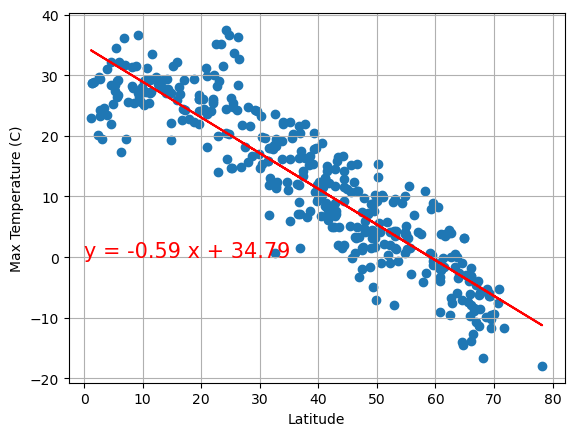

<Figure size 1000x675 with 0 Axes>

In [15]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]

res = linregress(x, y)
print("The r-value is: ", res.rvalue)
slope, intercept = np.polyfit(x, y, 1)
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

plt.scatter(
    x=x,
    y=y, 
    marker="o"
)
plt.plot(x, slope * x + intercept, color='red')


# Incorporate the other graph properties
plt.annotate("y = " + str(round(slope,2)) + " x + " + str(round(intercept,2)),(0,0), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True) 
plt.figure(figsize=(10, 6.75))

# # Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

The r-value is:  0.7374689863939512


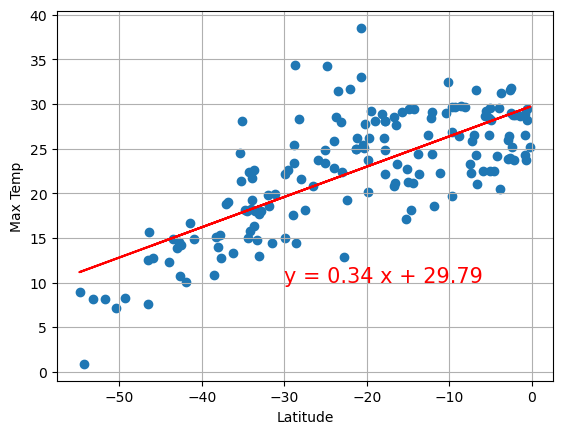

<Figure size 1000x675 with 0 Axes>

In [16]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

res = linregress(x, y)
print("The r-value is: ", res.rvalue)
slope, intercept = np.polyfit(x, y, 1)

# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    x=x,
    y=y, 
    marker="o"
)
plt.plot(x, slope * x + intercept, color='red')

# # Incorporate the other graph properties
plt.annotate("y = " + str(round(slope,2)) + " x + " + str(round(intercept,2)),(-30,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True) 
plt.figure(figsize=(10, 6.75))

# # Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** The correlation r measures the strength of the linear relationship 
between two quantitative variables.

Here, r = -0.905638879998046 in the northern hemisphere and r = -0.9071019501280709 in the southern hemishpere indicting negative and positive that are Strong, respectively, although the norhtern hemisphere has a stronger relationship .  In a nutshell and generally speaking, temperatures decrease portionally as one moves northy or southly from the equator at 0 degree latitude. 

See https://www.westga.edu/academics/research/vrc/assets/docs/scatterplots_and_correlation_notes.pdf#:~:text=The%20correlation%20r%20measures%20the%20strength%20of%20the,near%200%20indicate%20a%20very%20weak%20linear%20relationship.


### Humidity vs. Latitude Linear Regression Plot

The r-value is:  0.21045661407961802


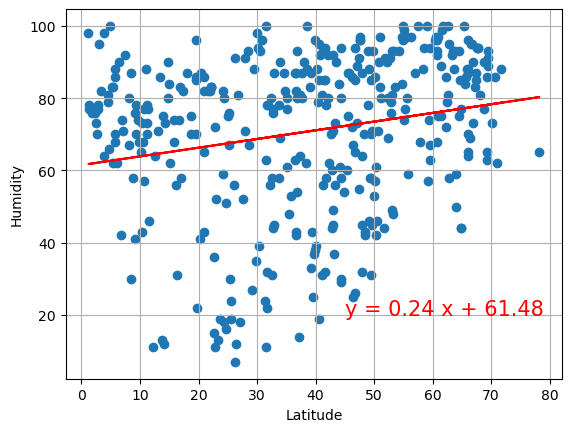

<Figure size 1000x675 with 0 Axes>

In [17]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

res = linregress(x, y)
print("The r-value is: ", res.rvalue)
slope, intercept = np.polyfit(x, y, 1)
annotation = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

plt.scatter(
    x=x,
    y=y, 
    marker="o"
)
plt.plot(x, slope * x + intercept, color='red')

# Incorporate the other graph properties
plt.annotate(annotation,(45,20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True) 
plt.figure(figsize=(10, 6.75))


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

The r-value is:  0.22438340240656232


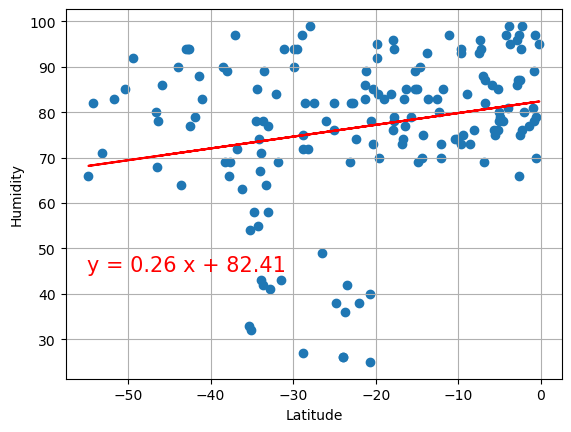

<Figure size 1000x675 with 0 Axes>

In [18]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

res = linregress(x, y)
print("The r-value is: ", res.rvalue)
slope, intercept = np.polyfit(x, y, 1)
annotation = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

plt.scatter(
    x=x,
    y=y, 
    marker="o"
)
plt.plot(x, slope * x + intercept, color='red')

# Incorporate the other graph properties
plt.annotate(annotation,(-55,45), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True) 
plt.figure(figsize=(10, 6.75))


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Here, r = 0.21045661407961802 in the northern hemisphere and r = 0.22438340240656232 in the southern hemishpere indicting that both have postive relationshps that are considered Very Weak in the reference cited above. Generally speaking, humidity doesn't really vary as one moves away from the equator. 




### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:  0.10889174067953444


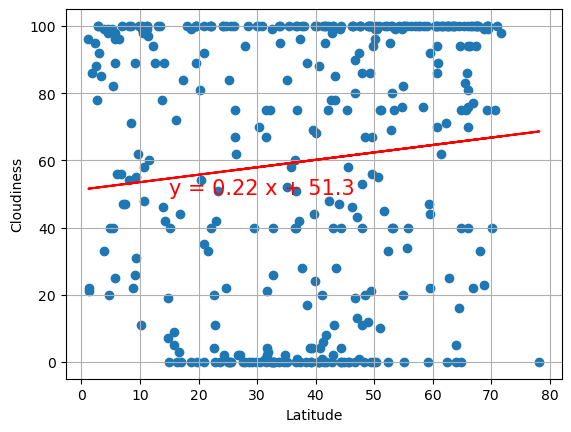

<Figure size 1000x675 with 0 Axes>

In [19]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

res = linregress(x, y)
print("The r-value is: ", res.rvalue)
slope, intercept = np.polyfit(x, y, 1)
annotation = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

plt.scatter(
    x=x,
    y=y, 
    marker="o"
)
plt.plot(x, slope * x + intercept, color='red')

# Incorporate the other graph properties
plt.annotate(annotation,(15,50), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True) 
plt.figure(figsize=(10, 6.75))

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

The r-value is:  0.205638795775187


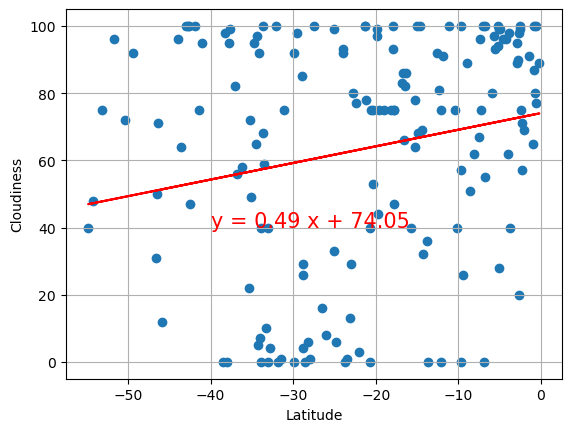

<Figure size 1000x675 with 0 Axes>

In [20]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

res = linregress(x, y)
print("The r-value is: ", res.rvalue)
slope, intercept = np.polyfit(x, y, 1)
annotation = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

plt.scatter(
    x=x,
    y=y, 
    marker="o"
)
plt.plot(x, slope * x + intercept, color='red')

# Incorporate the other graph properties
plt.annotate(annotation,(-40,40), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True) 
plt.figure(figsize=(10, 6.75))

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Here, r = 0.10889174067953444 in the northern hemisphere and r = 0.205638795775187 in the southern hemishpere indicting positive relationshps that are considered Very Weak and Weak, respectively, in the reference cited above.  Generally speaking, cloudiness doesn't really vary as one moves away from the equator. 
 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:  0.10786648437800127


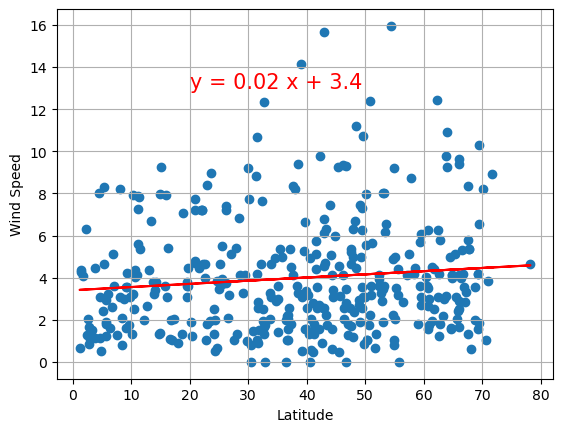

<Figure size 1400x3000 with 0 Axes>

In [21]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]

res = linregress(x, y)
print("The r-value is: ", res.rvalue)
slope, intercept = np.polyfit(x, y, 1)
annotation = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

plt.scatter(
    x=x,
    y=y, 
    marker="o"
)
plt.plot(x, slope * x + intercept, color='red')

# Incorporate the other graph properties
plt.annotate(annotation,(20,13), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True) 
plt.figure(figsize=(14, 30))

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

The r-value is:  -0.26197981618000543


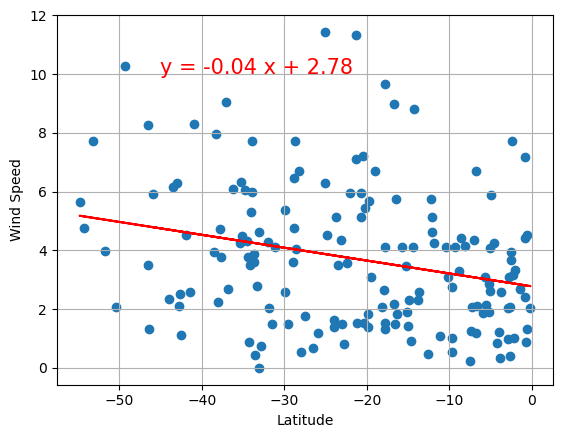

<Figure size 1000x675 with 0 Axes>

In [22]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

res = linregress(x, y)
print("The r-value is: ", res.rvalue)
slope, intercept = np.polyfit(x, y, 1)
annotation = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

plt.scatter(
    x=x,
    y=y, 
    marker="o"
)
plt.plot(x, slope * x + intercept, color='red')

# Incorporate the other graph properties
plt.annotate(annotation,(-45,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True) 
plt.figure(figsize=(10, 6.75))

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** Here, r = 0.10786648437800127  in the northern hemisphere and r  -0.261979816180005434 in the southern hemishpere indicting negative and positive relationshps, respectively, that are considered Very Weak in the reference cited above.  Generally speaking, wind speed doesn't really vary as one moves away from the equator. 
